For this assignment,  we will use CIFAR10 Dataset.


*   The CIFAR10 dataset consists of 60,000 32x32 images in different classes. The 10 different classes represents cars, birds, cats, deer, dogs, frogs, horses, ships, trucks and aeroplanes. There are 6,000 images of each class.



# Importing Keras Libraries and Modules

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

# Importing Cifar10 dataset

In [0]:
# Importing Cifar10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

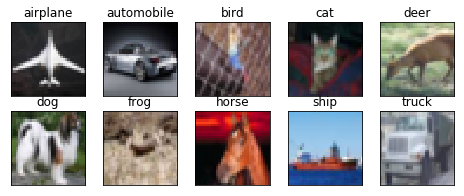

In [4]:
# Ploting each class from cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
#Function to define accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Conv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 15s 39ms/step - loss: 1.8472 - acc: 0.2927 - val_loss: 1.4107 - val_acc: 0.4816
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3332 - acc: 0.5157 - val_loss: 1.1248 - val_acc: 0.6000
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1225 - acc: 0.6053 - val_loss: 0.9572 - val_acc: 0.6544
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9801 - acc: 0.6574 - val_loss: 0.9134 - val_acc: 0.6815
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8789 - acc: 0.6925 - val_loss: 0.7949 - val_acc: 0.7287
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8048 - acc: 0.7227 - val_loss: 0.7315 - val_acc: 0.7508
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7502 - acc: 0.7426 - val_loss: 0.7170 - val_acc: 0.7504
Epoch 8/100
390/390 [==============================] - 9s 22m

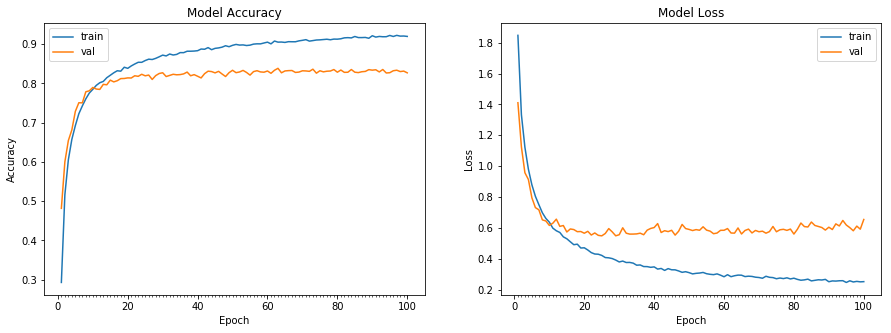

Accuracy on test data is: 82.70


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

From the above base network, will make few basic changes to improve training accuracy in less number of parameters.


1.   Remove Dense Layers
2.   Use Batch Normalization
3.   Proper use of 1x1 channel
4.   Proper placement of dropouts



In [15]:
# Changes done on above base model to improve accuracy
from keras import regularizers

new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu')) #32


new_model.add(Conv2D(64, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu')) #32


new_model.add(MaxPooling2D(pool_size=(2, 2))) #16
new_model.add(Dropout(0.2))

new_model.add(Conv2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu')) #16


new_model.add(Conv2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu')) #16


new_model.add(MaxPooling2D(pool_size=(2, 2))) #8
new_model.add(Dropout(0.3))

new_model.add(Conv2D(128, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu')) #8


new_model.add(Conv2D(256, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
new_model.add(BatchNormalization())
new_model.add(Activation('relu')) #8


new_model.add(MaxPooling2D(pool_size=(2, 2))) #4
new_model.add(Dropout(0.5))

new_model.add(Conv2D(10, 1, 1))

new_model.add(AveragePooling2D(pool_size = (4,4)))
new_model.add(Flatten())


new_model.add(Activation('softmax'))
# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=75)`
  app.launch_new_instance()


Epoch 1/75
390/390 [==============================] - 32s 82ms/step - loss: 1.3477 - acc: 0.5311 - val_loss: 2.1236 - val_acc: 0.4214

Epoch 00001: val_acc improved from -inf to 0.42140, saving model to assignment6_model_A-2.h5
Epoch 2/75
390/390 [==============================] - 28s 72ms/step - loss: 0.9898 - acc: 0.6719 - val_loss: 0.9833 - val_acc: 0.6693

Epoch 00002: val_acc improved from 0.42140 to 0.66930, saving model to assignment6_model_A-2.h5
Epoch 3/75
390/390 [==============================] - 28s 71ms/step - loss: 0.8368 - acc: 0.7292 - val_loss: 1.0340 - val_acc: 0.6727

Epoch 00003: val_acc improved from 0.66930 to 0.67270, saving model to assignment6_model_A-2.h5
Epoch 4/75
390/390 [==============================] - 27s 70ms/step - loss: 0.7450 - acc: 0.7673 - val_loss: 1.2941 - val_acc: 0.6031

Epoch 00004: val_acc did not improve from 0.67270
Epoch 5/75
390/390 [==============================] - 27s 70ms/step - loss: 0.6828 - acc: 0.7907 - val_loss: 0.7484 - val_acc

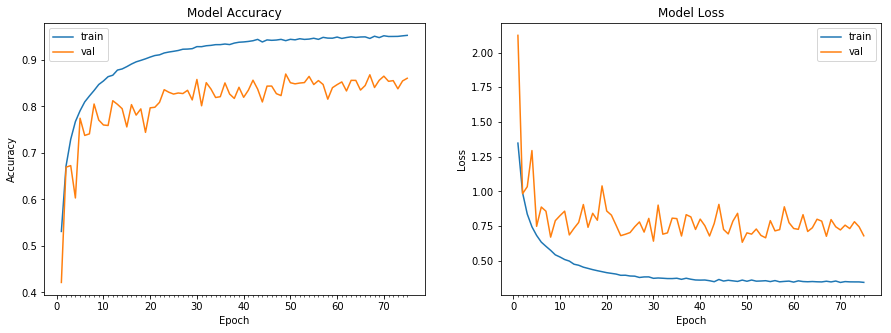

Accuracy on test data is: 86.97


In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

checkpointer = ModelCheckpoint(filepath='assignment6_model_A-2.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
new_model_info = new_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(new_model_info)
# compute test accuracy
# Load the weights with the best validation accuracy:
new_model.load_weights('assignment6_model_A-2.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, new_model))